<a href="https://colab.research.google.com/github/SedhuRSK/Analyzing-State-Employee-Payroll/blob/main/Analyzing_State_Employee_Payroll_Data_for_Strategic_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path='/content/drive/MyDrive/2024_State_Employee_Pay.csv'

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/2024_State_Employee_Pay.csv'
data = pd.read_csv(path)

agency_payroll = data.groupby('Agency Name')['YTD Gross Pay'].sum().sort_values(ascending=False)

print(agency_payroll.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Agency Name
CORRECTIONS                           4.745200e+08
MENTAL HEALTH                         3.798361e+08
SOCIAL SERVICES                       3.168652e+08
TRANSPORTATION                        2.894702e+08
PUBLIC SAFETY                         2.724058e+08
JUDICIARY                             2.520537e+08
OFFICE OF ADMINISTRATION              1.200999e+08
HEALTH AND SENIOR SERVICES            1.071575e+08
CONSERVATION                          9.503995e+07
ELEMENTARY AND SECONDARY EDUCATION    8.934443e+07
Name: YTD Gross Pay, dtype: float64


In [5]:
# Calculate average pay for each position
position_avg_pay = data.groupby('Position Title')['YTD Gross Pay'].mean().sort_values(ascending=False)

print(position_avg_pay.head(10))


Position Title
CLIENT/PATIENT WORKER         1.537077e+06
MEDICAL ADMINISTRATOR         3.287603e+05
PSYCHIATRIST                  2.322187e+05
SUPREME COURT JUDGE (CH)      2.102977e+05
SUPREME COURT JUDGE           2.010689e+05
CHIEF PHYSICIAN               1.964026e+05
STAFF PHYSICIAN SPECIALIST    1.954341e+05
DIRECTOR OF INVESTMENTS       1.927868e+05
CSC EXECUTIVE DIRECTOR        1.826990e+05
CLERK OF THE SUPREME COURT    1.799663e+05
Name: YTD Gross Pay, dtype: float64


In [6]:
# Sort the dataset by YTD Gross Pay in descending order
top_earners = data.sort_values('YTD Gross Pay', ascending=False).head(10)

# Display the top earners
print(top_earners[['Employee Name', 'Position Title', 'Agency Name', 'YTD Gross Pay']])


                  Employee Name              Position Title    Agency Name  \
31845   CLIENT/PATIENT WORKERS,       CLIENT/PATIENT WORKER  MENTAL HEALTH   
35308          LELE, MANISHA M.                PSYCHIATRIST  MENTAL HEALTH   
35295         BUWA, OMAGBEMI A.                PSYCHIATRIST  MENTAL HEALTH   
35326           VANGALA, SEKHAR                PSYCHIATRIST  MENTAL HEALTH   
35329         YARASI, NAVEEN K.                PSYCHIATRIST  MENTAL HEALTH   
35301        EL-RUWIE, NEZAR A.                PSYCHIATRIST  MENTAL HEALTH   
35135           SEXE, ROBERT B.                   PHYSICIAN  MENTAL HEALTH   
38687           ZEREIK, JAMAL A             STAFF PHYSICIAN  MENTAL HEALTH   
38656  AUGUSTINE, AMALA KUMAR D  STAFF PHYSICIAN SPECIALIST  MENTAL HEALTH   
35323             SWITZER, DALE                PSYCHIATRIST  MENTAL HEALTH   

       YTD Gross Pay  
31845     1537077.17  
35308      509932.87  
35295      475770.41  
35326      424932.18  
35329      410930.49  
353

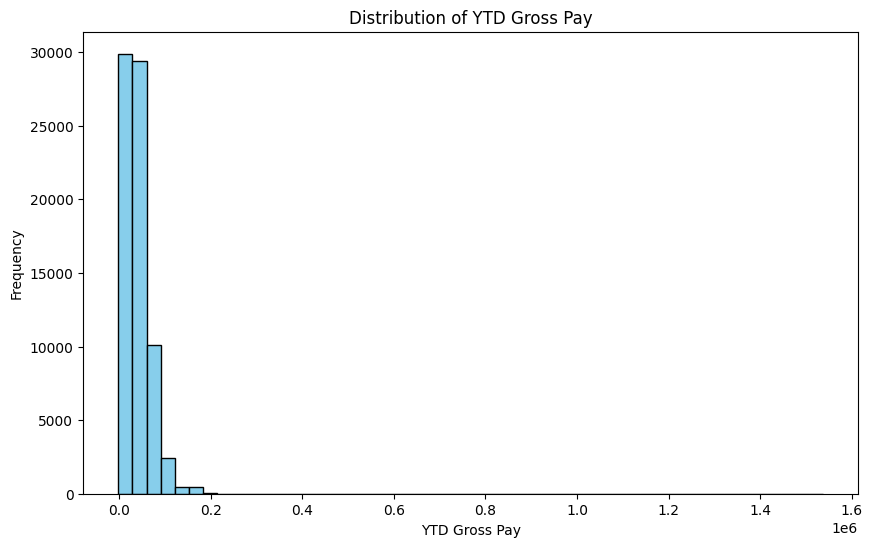

In [7]:
import matplotlib.pyplot as plt

# Plot a histogram of YTD Gross Pay
plt.figure(figsize=(10, 6))
plt.hist(data['YTD Gross Pay'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of YTD Gross Pay')
plt.xlabel('YTD Gross Pay')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Calculate average pay for each agency
agency_avg_pay = data.groupby('Agency Name')['YTD Gross Pay'].mean().sort_values(ascending=False)

# Display the top 10 agencies by average pay
print(agency_avg_pay.head(10))


Agency Name
OFFICE OF GOVERNOR               59558.236571
OFFICE OF ATTORNEY GENERAL       54943.587929
ECONOMIC DEVELOPMENT             50728.498972
LEGISLATURE                      50253.460071
OFFICE OF LIEUTENANT GOVERNOR    49548.098333
JUDICIARY                        49490.229992
COMMERCE AND INSURANCE           49359.103042
OFFICE OF ADMINISTRATION         48980.377614
HEALTH AND SENIOR SERVICES       44519.124105
OFFICE OF STATE AUDITOR          43256.234130
Name: YTD Gross Pay, dtype: float64


In [9]:
# Calculate pay range for each agency
agency_pay_range = data.groupby('Agency Name')['YTD Gross Pay'].agg(['min', 'max', 'mean', 'std']).sort_values(by='max', ascending=False)

# Display pay range statistics for the top 10 agencies
print(agency_pay_range.head(10))



                                        min         max          mean  \
Agency Name                                                             
MENTAL HEALTH                      -1834.88  1537077.17  35215.663561   
SOCIAL SERVICES                     -428.20   277809.34  36044.274091   
TRANSPORTATION                       -68.90   244277.03  41746.489864   
HEALTH AND SENIOR SERVICES          -201.48   222470.62  44519.124105   
JUDICIARY                           -202.70   210297.69  49490.229992   
HIGHER EDUCATION AND WORKFORCE DEV   525.18   202933.53  40399.748949   
OFFICE OF ADMINISTRATION              -5.45   199669.62  48980.377614   
OFFICE OF STATE TREASURER           1031.25   192786.82  40535.558493   
REVENUE                              -92.29   187111.80  33524.439064   
ECONOMIC DEVELOPMENT                   3.12   186938.39  50728.498972   

                                             std  
Agency Name                                       
MENTAL HEALTH        

In [10]:
# Calculate total payroll for each position
position_payroll = data.groupby('Position Title')['YTD Gross Pay'].sum().sort_values(ascending=False)

# Display the top 10 positions by total payroll
print(position_payroll.head(10))


Position Title
CORRECTIONAL OFFICER            1.774228e+08
SUPPORT CARE ASSISTANT          8.757121e+07
SOCIAL SERVICES SPECIALIST      6.402982e+07
REGISTERED NURSE                6.070160e+07
BENEFIT PROGRAM TECHNICIAN      5.882076e+07
PROBATION AND PAROLE OFFICER    5.425271e+07
ADMIN SUPPORT ASSISTANT         4.136201e+07
SENIOR MAINTENANCE WORKER       3.798569e+07
CORRECTIONAL SERGEANT           3.540050e+07
ASSOCIATE CIRCUIT JUDGE         3.209668e+07
Name: YTD Gross Pay, dtype: float64


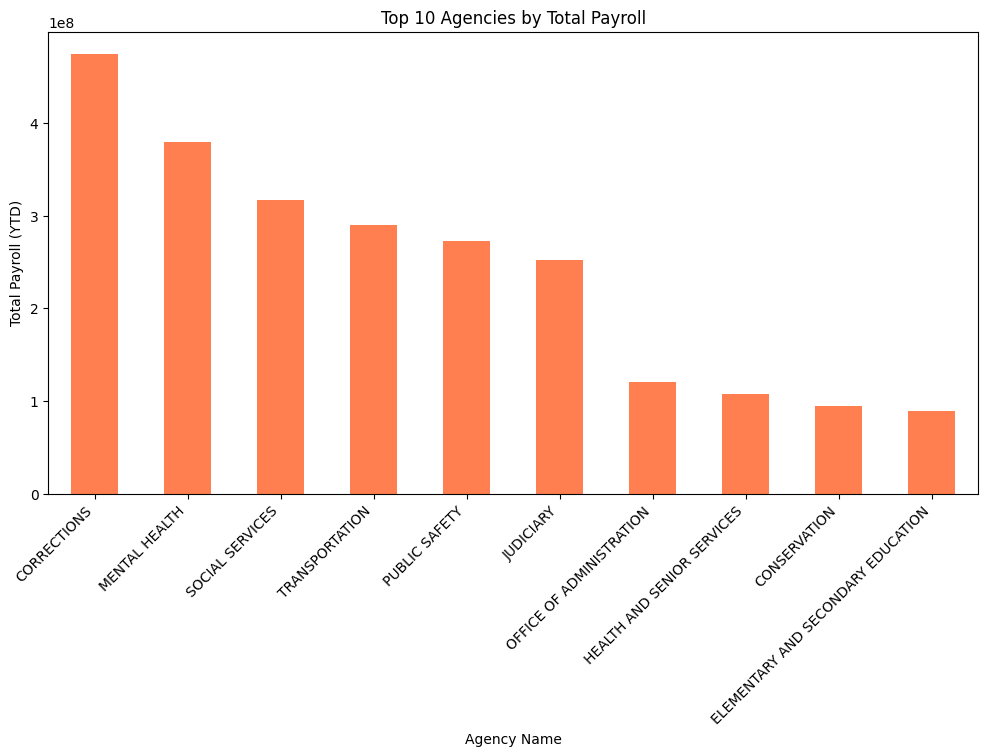

In [11]:
# Select the top 10 agencies by total payroll
top_agencies = agency_payroll.head(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
top_agencies.plot(kind='bar', color='coral')
plt.title('Top 10 Agencies by Total Payroll')
plt.ylabel('Total Payroll (YTD)')
plt.xlabel('Agency Name')
plt.xticks(rotation=45, ha='right')
plt.show()


In [12]:
# Count the number of employees in each agency
employee_count = data['Agency Name'].value_counts()

# Display the top 10 agencies by employee count
print(employee_count.head(10))


Agency Name
CORRECTIONS                           13715
MENTAL HEALTH                         10786
SOCIAL SERVICES                        8791
PUBLIC SAFETY                          7032
TRANSPORTATION                         6934
JUDICIARY                              5093
ELEMENTARY AND SECONDARY EDUCATION     2907
OFFICE OF ADMINISTRATION               2452
NATURAL RESOURCES                      2431
HEALTH AND SENIOR SERVICES             2407
Name: count, dtype: int64


In [14]:
# Correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=['number']) # Select only numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

               Calendar Year  YTD Gross Pay
Calendar Year            NaN            NaN
YTD Gross Pay            NaN            1.0
